In [1]:
import pandas as pd
import seaborn as sns
sns.set_context("notebook", rc={"figure.figsize": (20, 10)})

In [2]:
fp = 'data/20250412_MD1496_Takara/barcode00_fastq.ontarget.tsv'
df = pd.read_csv(fp, sep='\t')
df.head()

,seq,id,direction,prefix_flank,ins,suffix_flank,prefix_flank_q,ins_q,suffix_flank_q
0,GTTGTGCCTGTACTGGTTCAGTTACGTATTGCTGAACGGGGCTGGA...,@00080c17-37f0-46a1-970c-9d5f2f7825f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TGTGCCTGTGCTTCGTTCAGTTACGTATTGCTAATTCTCTTAGCAT...,@000827e2-05df-43ea-802b-0d37b47e7fc7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ATCCATGGCACCCATTCATTACATCTTGCTCTTCCAGGCCTGCAGT...,@000d9e19-ebcf-46f6-b3c2-fe8f38d941c2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TGTTATGTCCTACTCGTTCAGTTACGTATTGTTCTTCCAGGCCTCA...,@0017c4f6-ebec-4b9b-b24e-7cb5a7dd36c2,fwd,TGTGACCAGC,AGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCAGCA...,CATTACCACT,"2-,**434;>",FSJHOJOSJISJEDEESSABBCJDJFSKIPISHHKSJGNC@ANSLJ...,"B.,,%%%%&&"
4,TTTGTCATTCTACTGGTAGATTTCGTATTGCTAATTCAGGTTTATT...,@001bf84f-9522-45ef-aa63-8dc8abdf4635,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['seq_len'] = df['seq'].str.len()

In [4]:
def cnt(row):
    CAG = row['seq'].count('CAGCAGCAGCAG')
    CTG = row['seq'].count('CTGCTGCTGCTG')
    return CAG + CTG

In [5]:
df['motif_cnt'] = df.apply(cnt, axis=1)

In [6]:
df['offtarget'] = df['direction'].isna()

<Axes: xlabel='seq_len', ylabel='motif_cnt'>

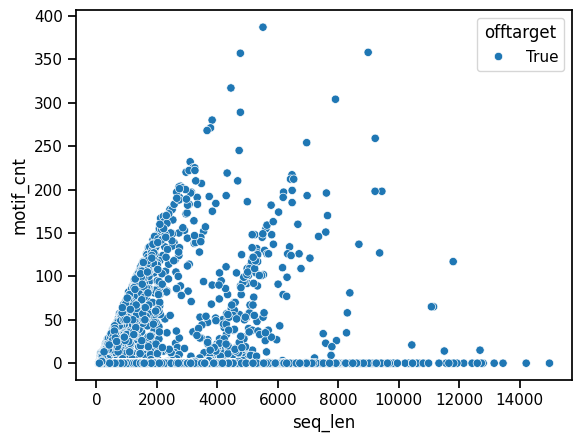

In [7]:
cond = df['offtarget']
sns.scatterplot(df[cond], x='seq_len', y='motif_cnt', hue='offtarget')

<Axes: xlabel='seq_len', ylabel='motif_cnt'>

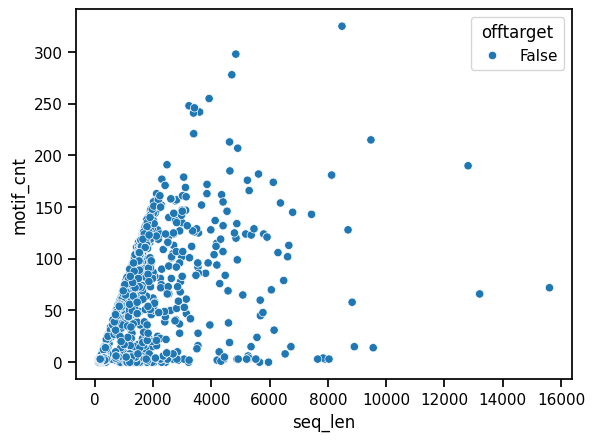

In [8]:
cond = ~df['offtarget']
sns.scatterplot(df[cond], x='seq_len', y='motif_cnt', hue='offtarget')

<Axes: xlabel='seq_len', ylabel='motif_cnt'>

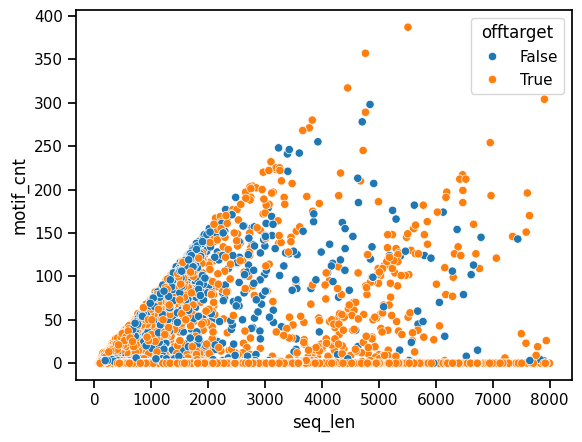

In [9]:
cond = df['seq_len'] <= 8000
sns.scatterplot(df[cond], x='seq_len', y='motif_cnt', hue='offtarget')